# 1. Lecture Overview

- Assumptions behind CAPM 
- CAPM predictions
- Adjusted betas and portfolio betas
- Application
    - Download prices for 10 stocks and calculate their betas
    - Plot their expected returns against their betas

# 2. The capital asset pricing model (CAPM)

**CAPM assumptions:**


- Markets are perfectly competitive
    - No investor is wealthy enough to individually affect prices
    - All information is publicly available; all securities are public
    - No taxes on returns, no transaction costs
    - Unlimited borrowing/lending at risk-free rate
    
    
- Investors are all alike except for initial wealth and risk aversion
    - Investors plan for a single-period horizon; they are rational, mean-variance optimizers
    - Investors use the same inputs, consider identical portfolio opportunity sets
    

**CAPM predictions:**

- The risk premium on individual assets is proportional to the risk premium on the market:

$$E[R_{i}] = R_{f} +  \beta_i (E[R_{m}] - R_{f}) $$

- All assets have single-factor model alpha of 0
    - We say that **CAPM fails to correctly price an asset** if we find that that asset has a non-zero alpha


- The market portfolio is the optimal risky portfolio (the tangency portfolio) in the economy


- All investors choose to hold a combination of the risk-free asset and the market portfolio (in different proportions, given by the investor's risk aversion)


**The Security Market Line (SML):**

If the CAPM assumptions hold, plotting all securities' risk premia ($E[R_{i}] - R_{f}$) against their betas ($\beta_i$) results in a single line called the Security Market Line (SML). 

# 3. Adjusted betas and portfolio betas

Betas tend to revert to the mean (high betas tend to go down and low betas tend to go up). When predicting betas, we take this tendency into account by calculating **adjusted betas**. These are weighted averages of the estimated beta and the mean (which is 1):

$$\beta_i^{adj} = \beta_i \times 2/3 + 1/3$$

Other weights can be used but 2/3 is a very common one.

**Portfolio betas** are weighted averages of the betas of the individual assets in the portfolio:

$$\beta_p = w_i \beta_1 + w_2 \beta_2 + ... + w_N \beta_N$$

# 4. Application

From Yahoo Finance, download data on adjusted close prices for the past 10 years for the following tickers: 'AAPL', 'GE', 'F', 'GM', 'NFLX', 'MSFT', 'GS', 'JPM', 'AMD', 'NVDA'.

For all stocks:
- Calculate monthly returns
- Calculate market betas and store them in the same dataframe
- Calculate average returns and store them in the same dataframe
- Plot average returns against betas
- Calculate the beta of a portfolio that invests 60% in AAPL and 40% in GM
- Calculate adjusted betas for all stocks

In [1]:
# Import packages
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt

### 4.1. Prepare data on stock returns

In [2]:
# Download adj price data and drop missing values
tickers = ['AAPL', 'GE', 'F', 'GM', 'NFLX', 'MSFT', 'GS','JPM', 'AMD','NVDA']
prices = yf.download(tickers, '2010-12-01', '2020-12-31', interval='1mo')['Adj Close'].dropna()
prices

[*********************100%***********************]  10 of 10 completed


,AAPL,AMD,F,GE,GM,GS,JPM,MSFT,NFLX,NVDA
Date,,,,,,,,,,
2010-12-01,9.922909,8.180000,11.381508,13.276432,28.488869,143.728668,32.073849,22.139410,25.100000,14.158958
2011-01-01,10.438492,7.830000,10.812093,14.734557,28.202892,139.848267,33.979225,21.996626,30.582857,21.992352
2011-02-01,10.865795,9.210000,10.202007,15.305214,25.915129,139.985062,35.342941,21.084394,29.524286,20.833893
2011-03-01,10.721204,8.600000,10.107103,14.770225,23.982893,135.845566,34.896347,20.259480,33.968571,16.972363
2011-04-01,10.771044,9.100000,10.486712,15.064892,24.802158,129.344498,34.540558,20.682383,33.238571,18.388250
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,128.394058,90.820000,6.820000,6.319061,29.629999,201.740707,98.559059,223.882996,529.559998,534.661987
2020-09-01,115.438042,81.989998,6.660000,6.209424,29.590000,199.098465,94.702866,209.298721,500.029999,540.898315
2020-10-01,108.510361,75.290001,7.730000,7.407717,34.529999,187.279556,96.444054,201.477280,475.739990,501.211914


In [3]:
# Calculate returns
returns = prices.pct_change().dropna()
returns

,AAPL,AMD,F,GE,GM,GS,JPM,MSFT,NFLX,NVDA
Date,,,,,,,,,,
2011-01-01,0.051959,-0.042787,-0.050030,0.109828,-0.010038,-0.026998,0.059406,-0.006449,0.218441,0.553246
2011-02-01,0.040935,0.176245,-0.056426,0.038729,-0.081118,0.000978,0.040134,-0.041471,-0.034613,-0.052676
2011-03-01,-0.013307,-0.066232,-0.009302,-0.034955,-0.074560,-0.029571,-0.012636,-0.039124,0.150530,-0.185348
2011-04-01,0.004649,0.058140,0.037559,0.019950,0.034160,-0.047856,-0.010196,0.020874,-0.021490,0.083423
2011-05-01,-0.006569,-0.046154,-0.035552,-0.039609,-0.008725,-0.068075,-0.047239,-0.035108,0.163880,0.002000
...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.214380,0.172930,0.031770,0.044481,0.190438,0.034906,0.046837,0.100093,0.083211,0.259992
2020-09-01,-0.100908,-0.097225,-0.023460,-0.017350,-0.001350,-0.013097,-0.039126,-0.065142,-0.055763,0.011664
2020-10-01,-0.060012,-0.081717,0.160661,0.192980,0.166948,-0.059362,0.018386,-0.037370,-0.048577,-0.073371


In [4]:
# Convert the index to "period('M')" (monthly)
returns.index = returns.index.to_period('M')
returns

,AAPL,AMD,F,GE,GM,GS,JPM,MSFT,NFLX,NVDA
Date,,,,,,,,,,
2011-01,0.051959,-0.042787,-0.050030,0.109828,-0.010038,-0.026998,0.059406,-0.006449,0.218441,0.553246
2011-02,0.040935,0.176245,-0.056426,0.038729,-0.081118,0.000978,0.040134,-0.041471,-0.034613,-0.052676
2011-03,-0.013307,-0.066232,-0.009302,-0.034955,-0.074560,-0.029571,-0.012636,-0.039124,0.150530,-0.185348
2011-04,0.004649,0.058140,0.037559,0.019950,0.034160,-0.047856,-0.010196,0.020874,-0.021490,0.083423
2011-05,-0.006569,-0.046154,-0.035552,-0.039609,-0.008725,-0.068075,-0.047239,-0.035108,0.163880,0.002000
...,...,...,...,...,...,...,...,...,...,...
2020-08,0.214380,0.172930,0.031770,0.044481,0.190438,0.034906,0.046837,0.100093,0.083211,0.259992
2020-09,-0.100908,-0.097225,-0.023460,-0.017350,-0.001350,-0.013097,-0.039126,-0.065142,-0.055763,0.011664
2020-10,-0.060012,-0.081717,0.160661,0.192980,0.166948,-0.059362,0.018386,-0.037370,-0.048577,-0.073371


### 4.2. Prepare data on market and Rf rate

In [5]:
# Download the monthly Fama French factors
ff3f = pdr.DataReader('F-F_Research_Data_Factors', 'famafrench','2011-01-01')[0]/100
ff3f

,Mkt-RF,SMB,HML,RF
Date,,,,
2011-01,0.0199,-0.0252,0.0082,0.0001
2011-02,0.0349,0.0153,0.0129,0.0001
2011-03,0.0046,0.0258,-0.0176,0.0001
2011-04,0.0290,-0.0037,-0.0243,0.0000
2011-05,-0.0127,-0.0058,-0.0205,0.0000
...,...,...,...,...
2020-10,-0.0210,0.0444,0.0403,0.0001
2020-11,0.1247,0.0548,0.0211,0.0001
2020-12,0.0463,0.0481,-0.0136,0.0001


In [6]:
# Combine the datasets and get rid of rows with missing values
full_data = ff3f.join(returns)
full_data = full_data.dropna()
full_data

,Mkt-RF,SMB,HML,RF,AAPL,AMD,F,GE,GM,GS,JPM,MSFT,NFLX,NVDA
Date,,,,,,,,,,,,,,
2011-01,0.0199,-0.0252,0.0082,0.0001,0.051959,-0.042787,-0.050030,0.109828,-0.010038,-0.026998,0.059406,-0.006449,0.218441,0.553246
2011-02,0.0349,0.0153,0.0129,0.0001,0.040935,0.176245,-0.056426,0.038729,-0.081118,0.000978,0.040134,-0.041471,-0.034613,-0.052676
2011-03,0.0046,0.0258,-0.0176,0.0001,-0.013307,-0.066232,-0.009302,-0.034955,-0.074560,-0.029571,-0.012636,-0.039124,0.150530,-0.185348
2011-04,0.0290,-0.0037,-0.0243,0.0000,0.004649,0.058140,0.037559,0.019950,0.034160,-0.047856,-0.010196,0.020874,-0.021490,0.083423
2011-05,-0.0127,-0.0058,-0.0205,0.0000,-0.006569,-0.046154,-0.035552,-0.039609,-0.008725,-0.068075,-0.047239,-0.035108,0.163880,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.0763,-0.0025,-0.0294,0.0001,0.214380,0.172930,0.031770,0.044481,0.190438,0.034906,0.046837,0.100093,0.083211,0.259992
2020-09,-0.0363,0.0006,-0.0251,0.0001,-0.100908,-0.097225,-0.023460,-0.017350,-0.001350,-0.013097,-0.039126,-0.065142,-0.055763,0.011664
2020-10,-0.0210,0.0444,0.0403,0.0001,-0.060012,-0.081717,0.160661,0.192980,0.166948,-0.059362,0.018386,-0.037370,-0.048577,-0.073371


**Example**

Using the data in "full_data", calculate the alpha and beta of AAPL using the single factor model

In [7]:
y = full_data['AAPL'] - full_data['RF']
X = full_data['Mkt-RF']
X = sm.add_constant(X)

In [8]:
res = sm.OLS(y,X).fit()
print(res.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000026E6FAA1B80>>


### 4.3. Calculate alpha and beta of all stocks

In [9]:
# Create empty dataframe to store results
allres = pd.DataFrame(index = tickers, columns = ['alpha', 'alpha_p', 'beta','avg_ret'])
allres

,alpha,alpha_p,beta,avg_ret
AAPL,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN
GM,NaN,NaN,NaN,NaN
NFLX,NaN,NaN,NaN,NaN
MSFT,NaN,NaN,NaN,NaN
GS,NaN,NaN,NaN,NaN
JPM,NaN,NaN,NaN,NaN
AMD,NaN,NaN,NaN,NaN
NVDA,NaN,NaN,NaN,NaN


In [10]:
# Set the independent variables for the regression
X = full_data['Mkt-RF']
X = sm.add_constant(X)
X

,const,Mkt-RF
Date,,
2011-01,1.0,0.0199
2011-02,1.0,0.0349
2011-03,1.0,0.0046
2011-04,1.0,0.0290
2011-05,1.0,-0.0127
...,...,...
2020-08,1.0,0.0763
2020-09,1.0,-0.0363
2020-10,1.0,-0.0210


In [11]:
# Loop through tickers and run their single-factor-model regression
for t in tickers:
    # Get firm excess returns
    y = full_data[t] - full_data['RF']

    # Run the regression
    reg = sm.OLS(y, X).fit()

    # Store alpha and beta and the average returns
    allres.loc[t,'alpha']   = reg.params['const']
    allres.loc[t,'alpha_p'] = reg.pvalues['const']
    allres.loc[t,'beta']    = reg.params['Mkt-RF']
    allres.loc[t,'avg_ret'] = y.mean()

In [12]:
# Print all results
allres

# Which stocks are mispriced (with respect to CAPM) at the 10% level? How about the 5% level? 1%?

,alpha,alpha_p,beta,avg_ret
AAPL,0.0122278,0.0531618,1.06206,0.0244361
GE,-0.0109281,0.133081,1.0904,0.00160599
F,-0.0136396,0.0206022,1.24024,0.00061699
GM,-0.010551,0.0956678,1.50697,0.00677154
NFLX,0.0250923,0.101559,1.14458,0.0382492
MSFT,0.0115261,0.0129387,0.785765,0.0205585
GS,-0.00953725,0.0675442,1.51924,0.00792645
JPM,-0.00158248,0.729224,1.32984,0.0137041
AMD,0.00831093,0.524302,2.12749,0.0327664
NVDA,0.0213447,0.0360385,1.3338,0.0366768


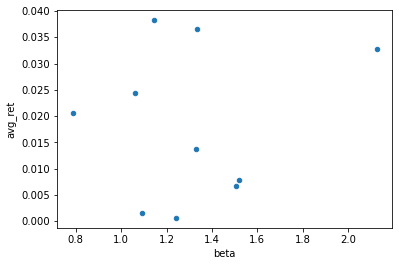

In [13]:
# Plot average returns against betas (do they line up?)
allres.plot.scatter(x = 'beta', y = 'avg_ret');

In [14]:
# Portfolio beta
beta_p = 0.6 * allres.loc['AAPL','beta'] + 0.4 * allres.loc['GM','beta']
beta_p

1.2400203829937038

In [15]:
# Adjusted betas
beta_adj = 2/3 * allres['beta'] + 1/3
beta_adj

AAPL     1.04137
GE       1.06027
F        1.16016
GM       1.33798
NFLX     1.09639
MSFT    0.857177
GS       1.34616
JPM       1.2199
AMD      1.75166
NVDA     1.22253
Name: beta, dtype: object